In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Loading the Dataset to python

In [3]:
df=pd.read_excel('/content/iris (1).xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Preprocessing

In [4]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
df['SL'].fillna(round(df['SL'].median(),1),inplace=True)
df['SW'].fillna(round(df['SW'].median(),1),inplace=True)
df['PL'].fillna(round(df['PL'].median(),1),inplace=True)

df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,4.4,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Checking for Outliers

<Axes: ylabel='PW'>

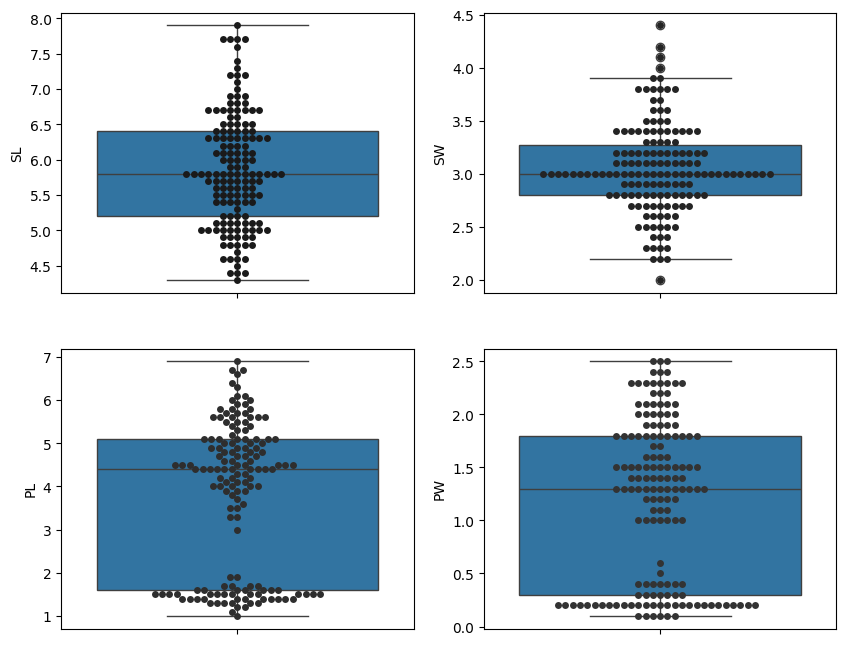

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,8))
sns.boxplot(ax=axes[0, 0], data=df['SL'])
sns.swarmplot(ax=axes[0, 0], data=df['SL'],color='.10')
sns.boxplot(ax=axes[0, 1], data=df['SW'])
sns.swarmplot(ax=axes[0, 1], data=df['SW'],color='.14')
sns.boxplot(ax=axes[1, 0], data=df['PL'])
sns.swarmplot(ax=axes[1, 0], data=df['PL'],color='.18')
sns.boxplot(ax=axes[1, 1], data=df['PW'])
sns.swarmplot(ax=axes[1, 1], data=df['PW'],color='.20')

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Classification']= le.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,4.4,2.0,2
148,6.2,3.4,5.4,2.3,2


Scaling using MinMax scaler

In [8]:
X = df.drop('Classification',axis=1)
y = df['Classification']

from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.03686383758765684
R squared value is  0.9472536505105069


In [9]:
X = df.drop('Classification',axis=1)

min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
X = min_max.fit_transform(X)

pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.862963,0.872778,0.943051,0.915556
std,0.449204,0.351663,0.586480,0.635967
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.666667,0.203390,0.166667
50%,0.833333,0.833333,1.152542,1.000000
75%,1.166667,1.062500,1.389831,1.416667
max,2.000000,2.000000,2.000000,2.000000


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.036863837587656906
R squared value is  0.9472536505105068


## **Finding out which classification model gives the best result**



*   Logistic Regression Model

In [20]:
y = df.Classification
X = df.drop('Classification',axis=True)


from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score


from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)
log_reg.fit(X_train_sc,y_train)
y_pred=log_reg.predict(X_test_sc)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [22]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_sc, y_train)
logistic_reg_pred = logistic_reg.predict(X_test_sc)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
logistic_precision = precision_score(y_test, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

logistic_reg_accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613




*   KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
knn_pred = knn.predict(X_test_sc)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')
print("KNN Accuracy:", knn_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,knn_pred))
print("precision_score:",knn_precision)
print("recall_score:",knn_recall)
print("f1_score:",knn_f1)

KNN Accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613




*   Decision Tree Classifier model

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sc, y_train)
decision_tree_pred = decision_tree.predict(X_test_sc)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)

Decision Tree Accuracy: 1.0
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0




*   SVM Model

In [25]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_sc, y_train)
svm_pred = svm.predict(X_test_sc)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

SVM Accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613




*   Random Forest Algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train_sc, y_train)
random_forest_pred = random_forest.predict(X_test_sc)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)

Random Forest Accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613




*   Hyper Parameter Tuning

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=2)
rf_clf.fit(X_train_sc,y_train)
y_pred = rf_clf.predict(X_test_sc)
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('Accuracy',accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred, average='macro'))
print("recall_score:",recall_score(y_test,y_pred, average='macro'))
print("f1_score:",f1_score(y_test,y_pred, average='macro'))

confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Accuracy 0.9666666666666667
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613


After applying all the classification methods on the given dataset, we can conclude that Decision tree classifier model gives the best result